In [ ]:
import os
import subprocess

def git_repo_root():
    # Run the 'git rev-parse --show-toplevel' command to get the root directory of the Git repository
    try:
        root = subprocess.check_output(['git', 'rev-parse', '--show-toplevel'], universal_newlines=True).strip()
        return root
    except subprocess.CalledProcessError:
        # Handle the case where the current directory is not inside a Git repository
        return None

# Get the root directory of the Git repository
git_root = git_repo_root()

if git_root:
    # Change the working directory to the root of the Git repository
    os.chdir(git_root)
    print(f"Changed working directory to: {git_root}")
else:
    print("Not inside a Git repository.")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


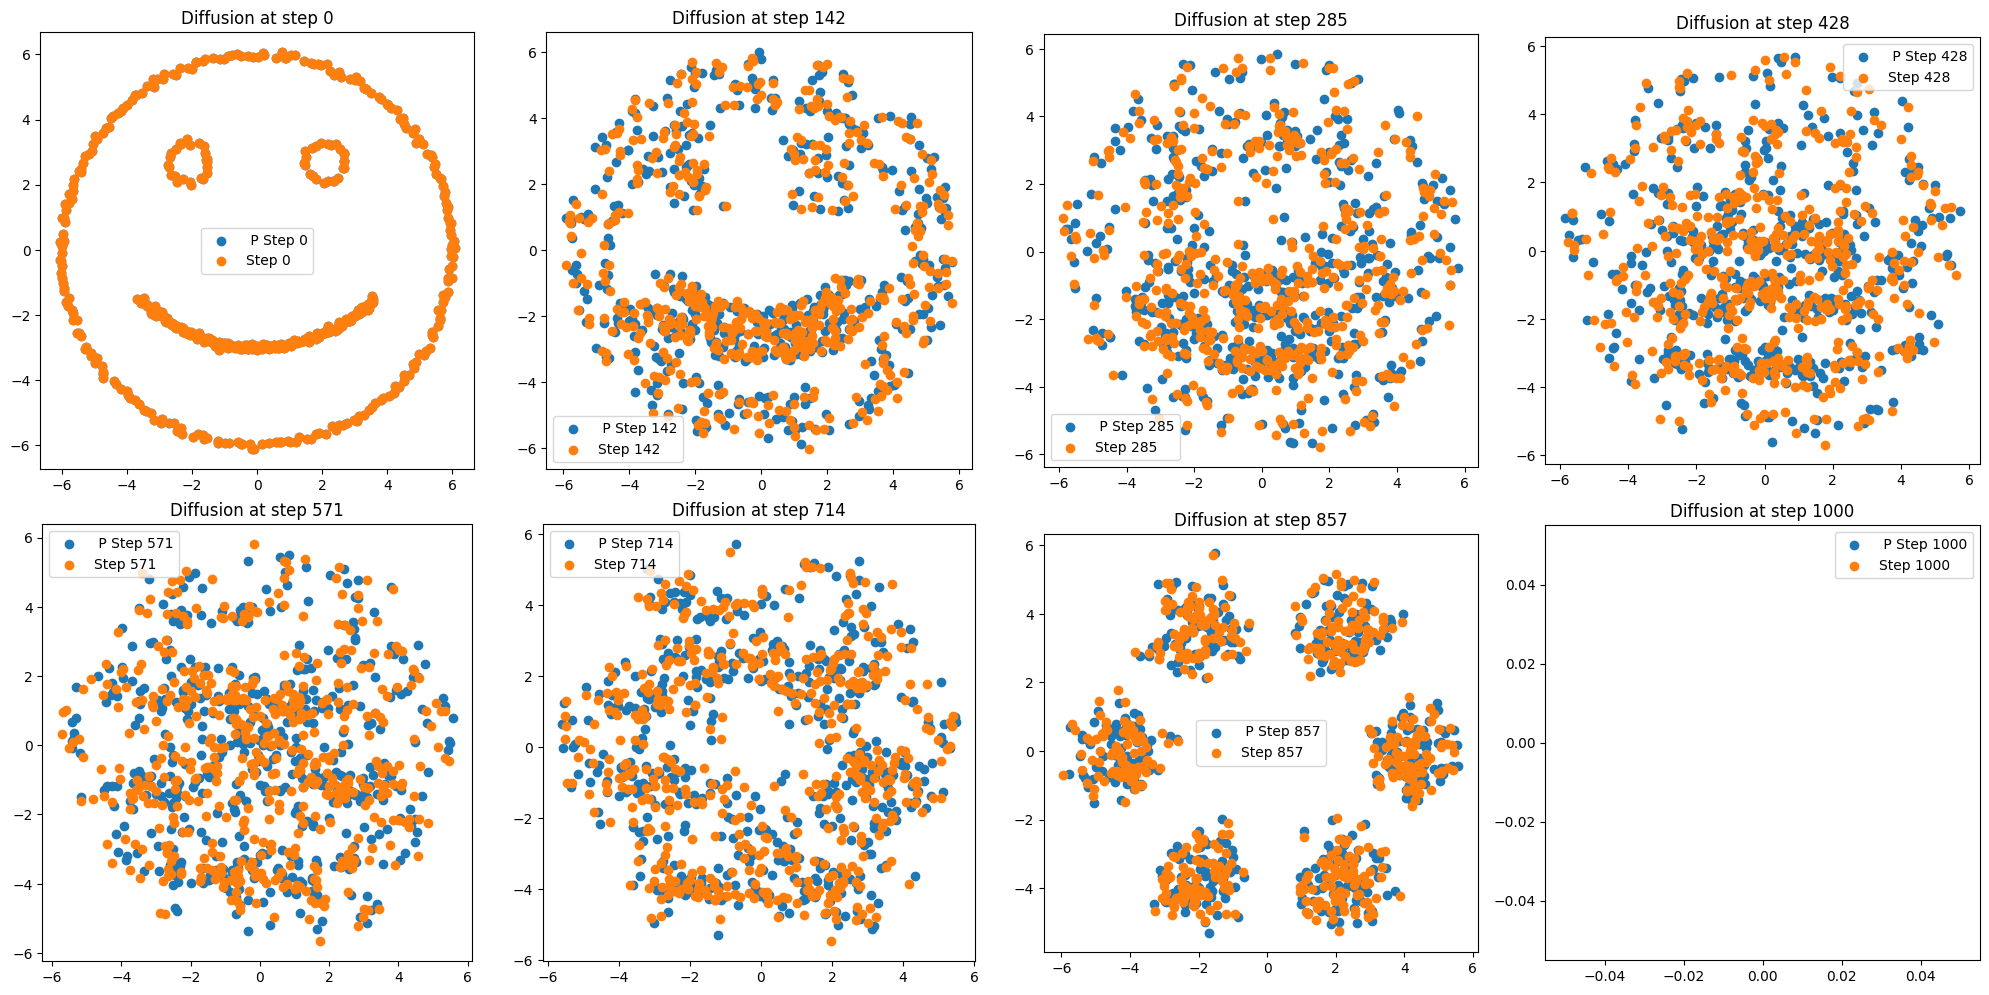

In [28]:
%load_ext autoreload
%autoreload 2

from diffusion import BridgeDiffusionVPSDE
from data import generate_mixture_gaussians
from data import generate_happy_face

# Make sure our diffusion process actually builds the bridge

data_x= generate_happy_face(500)
sde = BridgeDiffusionVPSDE(generate_mixture_gaussians)

sde.plot_forward_diffusion(data_x)
#For some reason the euler method fails at step 1000, idk

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


 20%|██        | 1000/5000 [03:23<08:04,  8.26it/s] /Users/stephenrobbins/Documents/Documents-Stephens_MacBook_Pro/Python/Random/Diffusion_project/diffusion.py:330: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  t1=torch.ones(self.num_samples) * t


Epoch: 1000 and Loss: 9.689630508422852


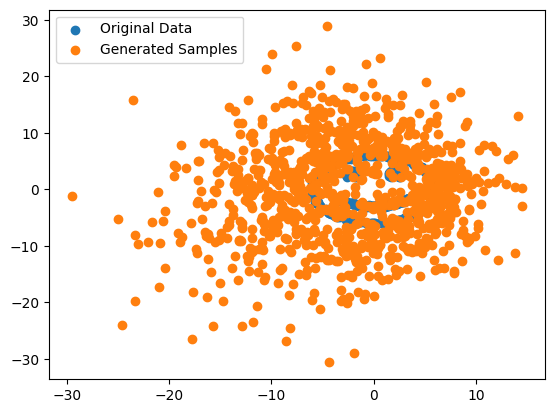

 40%|████      | 2000/5000 [06:27<05:44,  8.71it/s]  

Epoch: 2000 and Loss: 17.61732292175293


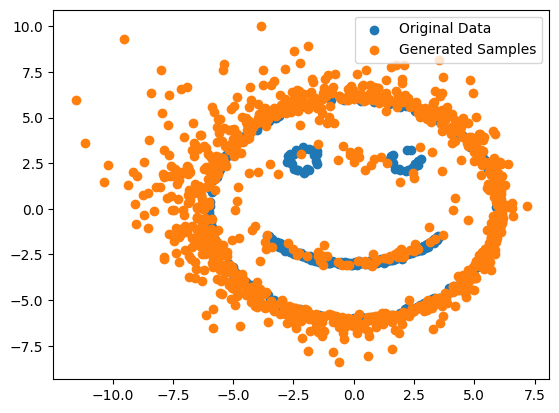

 60%|██████    | 3000/5000 [09:48<03:46,  8.84it/s]  

Epoch: 3000 and Loss: 24.682483673095703


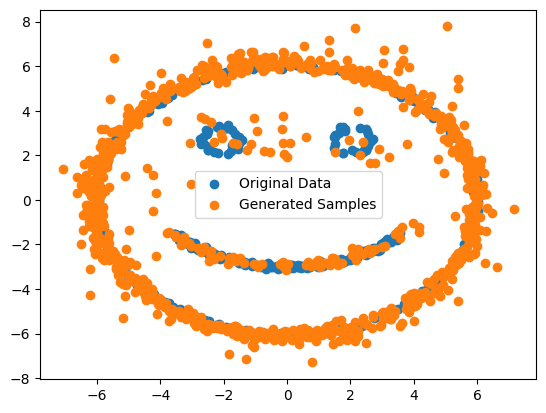

 80%|████████  | 4000/5000 [12:48<02:00,  8.31it/s]  

Epoch: 4000 and Loss: 31.45514488220215


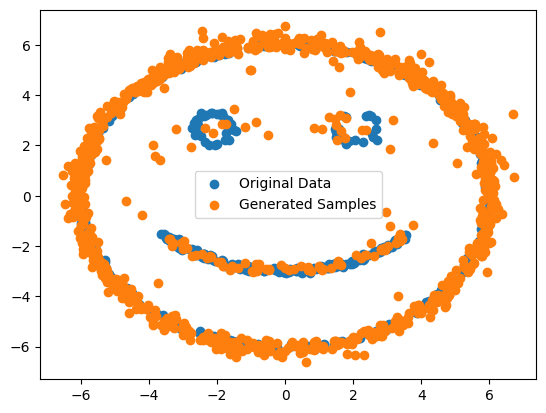

100%|█████████▉| 4999/5000 [16:33<00:00,  4.95it/s]  

Epoch: 4999 and Loss: 38.0707893371582


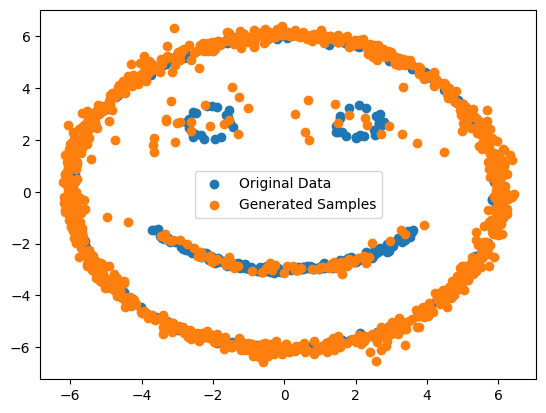

100%|██████████| 5000/5000 [17:01<00:00,  4.89it/s]


In [29]:
%load_ext autoreload
%autoreload 2

from torch.utils.data import DataLoader, TensorDataset
from training import train_score_network
from model import Bridge_Diffusion_Net

sde = BridgeDiffusionVPSDE(generate_mixture_gaussians)
data = generate_happy_face(num_samples=4000)
dataloader = DataLoader(TensorDataset(data), batch_size=500, shuffle=True)
score_net = Bridge_Diffusion_Net(input_dim=2)

train_score_network(dataloader, score_net, sde, epochs=5000, bridge=True)